Comparacion con efectividad de BAU

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-seguros/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[02/27/25 20:13:54] INFO     Resolved project path as:                                              ]8;id=794783;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=367367;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-seguros.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/27/25 20:13:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=599593;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=588125;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=898559;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=989610;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[02/27/25 20:13:55] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=133772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=801163;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=984169;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=755115;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [41]:
%reload_kedro

[02/25/25 21:12:47] INFO     Resolved project path as:                                              ]8;id=983101;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=570164;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/25/25 21:12:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=893185;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=903608;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=776567;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=336579;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=113324;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=132364;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params= catalog.load("parameters")

[02/27/25 20:14:00] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=219033;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=316625;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### cargue

In [27]:
seg_dic= pd.read_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/SEG/09-backtesting/dic_2024.parquet')
seg_dic.head(3)

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,CATEGORIA_GESTION,DESCRIPCION_FINAL,SUBDESCRIPCION_FINAL,familia_seguro,aper_accidentes_personales,aper_vida_grupo,aper_desempleo,aper_cáncer,aper_fraude,aper_hogar
685366,CC7697656,202412,1975-01-14,M,2.0,S,0.0,2023-03-07,10000000.0,8000000.0,...,Cross Selling,NO VENTA,NO VENTA,Accidentes Personales,0,0,0,0,0,0
685367,CC16376740,202412,1984-05-14,M,4.0,C,0.0,2006-11-10,52000000.0,8400000.0,...,Cross Selling,VENTA EFECTIVA,VENTA EFECTIVA,Accidentes Personales,1,0,0,0,0,0
685368,CC26666470,202412,1975-08-10,F,2.0,S,3.0,2002-07-31,10000000.0,5500000.0,...,Cross Selling,RECHAZO EN VALIDACIÓN,RECHAZO EN VALIDACIÓN,Accidentes Personales,0,0,0,0,0,0


In [15]:
aperturas = pd.read_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/SEG/01-raw/seg_conflgs_apertura.parquet')

In [60]:
aperturas2 = aperturas.copy()
aperturas2['hashvalue1'] = aperturas2['hashvalue1'].str[1:]
aperturas2.head(3)

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,CATEGORIA_GESTION,DESCRIPCION_FINAL,SUBDESCRIPCION_FINAL,familia_seguro,aper_accidentes_personales,aper_vida_grupo,aper_desempleo,aper_cáncer,aper_fraude,aper_hogar
0,C7540572,202401,1963-01-05,M,2.0,C,3.0,1988-02-15,100000000.0,1868000.0,...,Cross Selling,VENTA CANTADA,VENTA CANTADA,Accidentes Personales,0,0,0,0,0,0
1,C7715269,202401,1980-09-03,M,4.0,S,2.0,2005-02-09,10000000.0,3500000.0,...,Cross Selling,VENTA EFECTIVA,VENTA EFECTIVA,Accidentes Personales,1,0,0,0,0,0
2,C8764390,202401,1966-04-30,M,2.0,S,4.0,1999-09-08,300000000.0,14200000.0,...,Cross Selling,VENTA EFECTIVA,VENTA EFECTIVA,Accidentes Personales,1,0,0,0,0,0


In [25]:
desempleo = aperturas[(aperturas['familia_seguro'] == 'Desempleo')]
desempleo.head()
# backtesting_202411_d = aperturas[(aperturas['periodo'] == 202411) & (aperturas['familia_seguro'] == 'Desempleo')]
# backtesting_202410_d = aperturas[(aperturas['periodo'] == 202410) & (aperturas['familia_seguro'] == 'Desempleo')]
# backtesting_202409_d = aperturas[(aperturas['periodo'] == 202409) & (aperturas['familia_seguro'] == 'Desempleo')]
# backtesting_202408_d = aperturas[(aperturas['periodo'] == 202408) & (aperturas['familia_seguro'] == 'Desempleo')]
# backtesting_202407_d = aperturas[(aperturas['periodo'] == 202407) & (aperturas['familia_seguro'] == 'Desempleo')]

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,CATEGORIA_GESTION,DESCRIPCION_FINAL,SUBDESCRIPCION_FINAL,familia_seguro,aper_accidentes_personales,aper_vida_grupo,aper_desempleo,aper_cáncer,aper_fraude,aper_hogar
197,CC1000035945,202401,2003-06-01,M,2.0,S,0.0,2023-11-03,300000.0,3500000.0,...,Tradicional,Efectivo,Venta Efectiva,Desempleo,0,0,1,0,0,0
199,CC1002300552,202401,2001-08-22,F,2.0,S,0.0,2023-11-12,600000.0,2800000.0,...,Tradicional,Efectivo,Venta Efectiva,Desempleo,0,0,1,0,0,0
424,CC4207898,202401,1969-10-06,M,2.0,S,0.0,2023-10-09,80000000.0,7000000.0,...,Tradicional,NO EFECTIVO,CONTESTADOR AUTOMÁTICO - AGENTE,Desempleo,0,0,0,0,0,0
427,CC4641247,202401,NaT,None,NaN,None,NaN,NaT,NaN,NaN,...,Tradicional,NO EFECTIVO,NO CONTESTA - AGENTE,Desempleo,0,0,0,0,0,0
483,CC8486347,202401,1980-08-10,M,2.0,S,0.0,2023-10-04,3000000.0,2000000.0,...,Tradicional,NO INTERESADO,NO ESCUCHA OFERTA,Desempleo,0,0,0,0,0,0


In [31]:
if 'familia_seguro' in aperturas.columns:
    desempleo = aperturas[aperturas['familia_seguro'].fillna('') == 'Desempleo']
else:
    print("La columna 'familia_seguro' no existe en el DataFrame.")


In [32]:
desempleo.CODIGO_PRODUCTO_VENTA.value_counts()


CODIGO_PRODUCTO_VENTA
7003    30603
7005       72
Name: count, dtype: int64

In [14]:
data_bau= pd.read_csv('/home/sagemaker-user/data-bbog-integration-fabrica-seguros/data/bq-results-20241125.csv')
data_bau.head(3)

,DEFINIT,PRODUCTO,PRODUCTO_MARCACION,MULTIOFERTA,PROBABILIDAD_COMPRA,RANKING_PROBABILIDAD,MARCACION,FECHA,uuid,created_at
0,C1151964064,TC,7006,7006|7011|7007,0.426858,Alta,Modelo,2024-11-25,2a3ae94f-26ca-4592-b1cc-50dd8e428928,2024-11-25 17:40:02.119994 UTC
1,C1053857620,TC,7011,7011|7006|7007,0.426654,Alta,Modelo,2024-11-25,5908869e-6299-4c50-8a3d-a988bc1dc339,2024-11-25 17:40:02.119994 UTC
2,C28155598,TC,7006,7006|7003|7007,0.395527,Alta,Modelo,2024-11-25,c8b46f39-dca2-4128-ba24-2d8ca3cf767f,2024-11-25 17:40:02.119994 UTC


In [76]:
data_bau_desempleo = data_bau[data_bau['PRODUCTO_MARCACION'].isin([7003, 7005])][['PROBABILIDAD_COMPRA', 'DEFINIT']]
#data_bau_desempleo = data_bau[data_bau['MULTIOFERTA'].isin(['7003|7005','7005|7003'])][['PROBABILIDAD_COMPRA', 'DEFINIT']]
data_bau_desempleo = data_bau_desempleo.rename(columns = {'DEFINIT':'hashvalue1'})
data_bau_desempleo = data_bau_desempleo.rename(columns = {'PROBABILIDAD_COMPRA':'y_pred_proba'})
data_bau_desempleo

,y_pred_proba,hashvalue1
5,0.366211,C1122137045
6,0.366211,C1001913597
7,0.355346,C1020808749
10,0.339029,C39141240
11,0.339029,C5827888
...,...,...
232203,0.006572,C1098622375
232259,0.006276,C1095909672
232265,0.006256,C1063484693
232282,0.005727,C1128063040


In [101]:
print('Duplicados: ',data_bau_desempleo.drop_duplicates().shape[0])
print('N Obs:',data_bau_desempleo.shape[0])

Duplicados:  4593
N Obs: 4593


In [97]:
data_bau_desempleo

,y_pred_proba,hashvalue1
5,0.366211,C1122137045
6,0.366211,C1001913597
7,0.355346,C1020808749
10,0.339029,C39141240
11,0.339029,C5827888
...,...,...
232203,0.006572,C1098622375
232259,0.006276,C1095909672
232265,0.006256,C1063484693
232282,0.005727,C1128063040


In [72]:
print(data_bau.shape[0])
print(data_bau_desempleo.shape[0])

316751
4593


In [51]:
data_bau_desempleo = data_bau_desempleo.rename(columns={'PROBABILIDAD_COMPRA':'y_pred_proba', 'DEFINIT':'hashvalue1'})

In [80]:
save_backtesting_base = pd.read_pickle('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/SEG/09-backtesting/seg_desempleo/save_backtesting_202412_02.pickle')
save_backtesting_v1 = pd.read_pickle('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/SEG/09-backtesting/seg_desempleo/save_backtesting_202412_02_v1.pickle')

# data_backtesting11 = catalog.load("data_backtesting_202410_exp1")
# data_backtesting111 = catalog.load("data_backtesting_202410_anterior")

In [88]:
t=2
modelos = [save_backtesting_base,save_backtesting_v1]
nombres = ['Modelo 1','Modelo 2']

In [92]:
#n_tops = params['n_tops'] 
#n_tops = [1000,2000,3000,4000]+n_tops 
#params['n_tops'] = n_tops
params['n_tops']


[
    1000,
    2000,
    3000,
    4000,
    10000,
    25000,
    40000,
    60000,
    80000,
    100000,
    120000,
    140000,
    160000,
    180000,
    200000,
    220000,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0
]

In [105]:
dic = {}
full_base = np.min([base_calificada_fabrica2.shape[0],data_bau_desempleo.shape[0]])
for pos,save_backtesting in enumerate(modelos):
    base_calificada_fabrica = save_backtesting[t]['prediccion']
    base_calificada_fabrica2 = base_calificada_fabrica.copy()
    base_calificada_fabrica2['hashvalue1'] = base_calificada_fabrica2['hashvalue1'].str[1:]
    display(base_calificada_fabrica2.head(2))
    dic[nombres[pos]] = {'prediccion': base_calificada_fabrica2}
    dic[nombres[pos]]['contactabilidad'] = backtesting.create_curve_backtesting(base_calificada_fabrica2,full_base,params)

,hashvalue1,y_real,y_pred,y_pred_proba,decil_apertura,model_name
0,C1017205427,NaN,1,0.0028,3,"Ensamble,"
1,C2768026,NaN,1,0.0028,3,"Ensamble,"


,hashvalue1,y_real,y_pred,y_pred_proba,decil_apertura,model_name
0,C1072711376,NaN,1,0.0028,2,"Ensamble,"
1,C52422647,NaN,1,0.0028,2,"Ensamble,"


In [106]:
dic['bau'] = {'prediccion': data_bau_desempleo}
dic['bau']['contactabilidad'] = backtesting.create_curve_backtesting(data_bau_desempleo,full_base,params)

In [107]:
print('Obs: Bau: ',data_bau_desempleo.shape[0])                                                              
print('Obs: Fabrica: ',base_calificada_fabrica.shape[0])                                                              

Obs: Bau:  4593
Obs: Fabrica:  3081158


[02/27/25 22:14:37] INFO     Idenficamos hashvalue1 en el mismo "periodo" duplicados...                ]8;id=393815;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=923648;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#379\379]8;;\

                    INFO     Se eliminaron 2184 duplicados. Esto puede alterar positivao o             ]8;id=687610;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=886800;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#380\380]8;;\
                             negativamente los resultados del modelo                                               

                    INFO     Iniciando Rezago t-Modelo 1..                                             ]8;id=629104;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=211346;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: aper_desempleo_ID....        ]8;id=879774;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=243286;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[02/27/25 22:14:38] INFO     Tipo de Hashvalue1: ['C1' 'C2' 'C3' 'C7' 'C8' 'C6' 'C4' 'C9' 'C5' 'E7'    ]8;id=671341;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=882423;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E1' 'S1' 'I1' 'E6']                                                                  

                    INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=522225;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=907100;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             aper_desempleo_Freq....                                                               

                    INFO     Tipo de Hashvalue1: ['C1' 'C2' 'C3' 'C7' 'C8' 'C6' 'C4' 'C9' 'C5' 'E7'    ]8;id=380303;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=525063;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E1' 'S1' 'I1' 'E6']                                                                  

                    INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=519748;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=272533;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 5                                                     ]8;id=566908;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=732435;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Iniciando Rezago t-Modelo 2..                                             ]8;id=893512;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=748374;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: aper_desempleo_ID....        ]8;id=654222;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=341316;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[02/27/25 22:14:39] INFO     Tipo de Hashvalue1: ['C1' 'C5' 'C3' 'C4' 'C9' 'C6' 'C7' 'C8' 'C2' 'E3'    ]8;id=587060;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=782630;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E5' 'E7' 'E4' 'I1'                                                                   
                              'E9' 'E1' 'E8']                                                                      

                    INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=904446;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=190164;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             aper_desempleo_Freq....                                                               

[02/27/25 22:14:40] INFO     Tipo de Hashvalue1: ['C1' 'C5' 'C3' 'C4' 'C9' 'C6' 'C7' 'C8' 'C2' 'E3'    ]8;id=912889;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=982273;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E5' 'E7' 'E4' 'I1'                                                                   
                              'E9' 'E1' 'E8']                                                                      

                    INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=828536;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=503929;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 6                                                     ]8;id=196367;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=527094;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Iniciando Rezago t-bau..                                                  ]8;id=971954;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=865967;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: aper_desempleo_ID....        ]8;id=238501;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=184978;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

                    INFO     Tipo de Hashvalue1: ['C1' 'C3' 'C5' 'C4' 'C2' 'C7' 'C6' 'C9' 'C8' 'E3'    ]8;id=614591;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=655228;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E2' 'E5' 'E1' 'E7'                                                                   
                              'E4']                                                                                

                    INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=978524;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=671315;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             aper_desempleo_Freq....                                                               

                    INFO     Tipo de Hashvalue1: ['C1' 'C3' 'C5' 'C4' 'C2' 'C7' 'C6' 'C9' 'C8' 'E3'    ]8;id=725082;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=69078;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\
                             'E2' 'E5' 'E1' 'E7'                                                                   
                              'E4']                                                                                

                    INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=56329;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=883936;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 15                                                    ]8;id=149772;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=222374;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

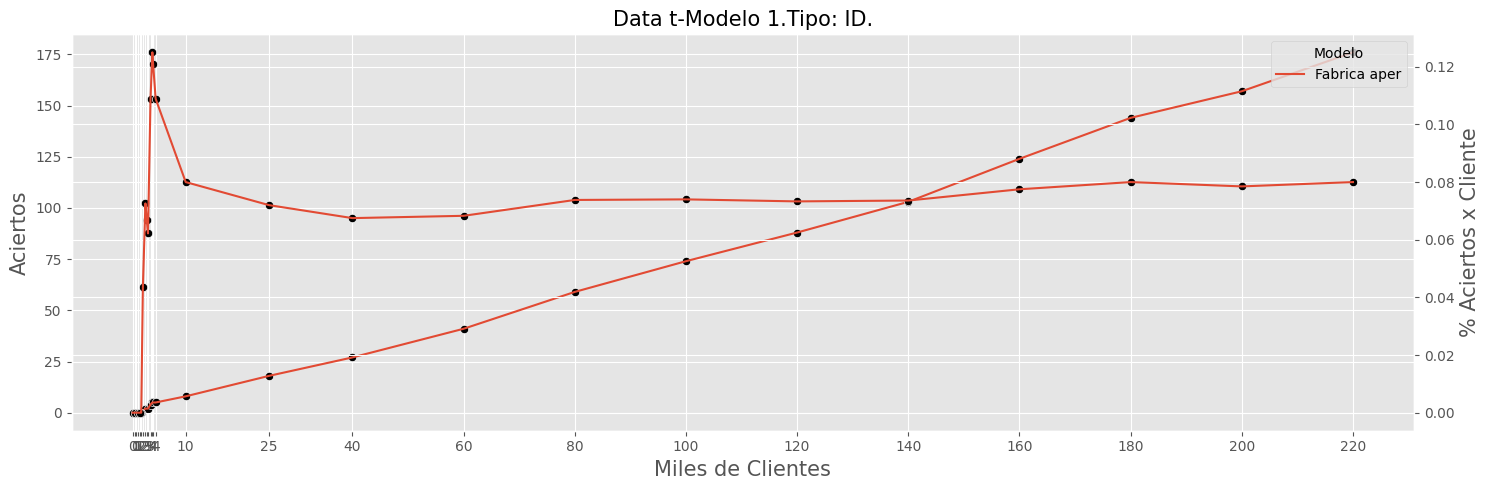

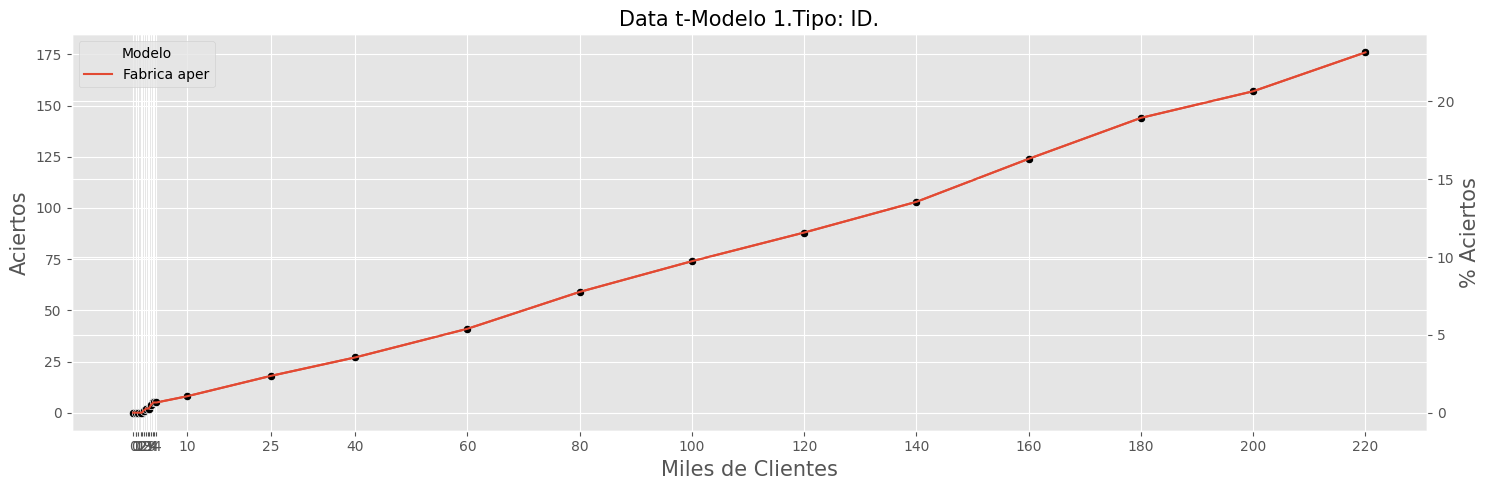

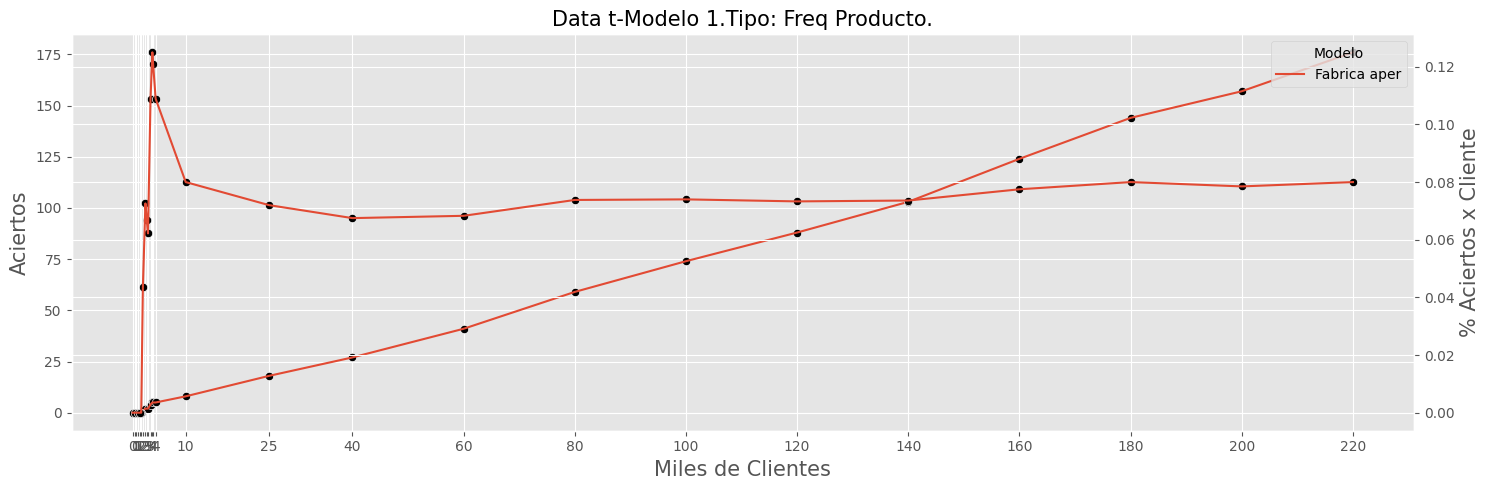

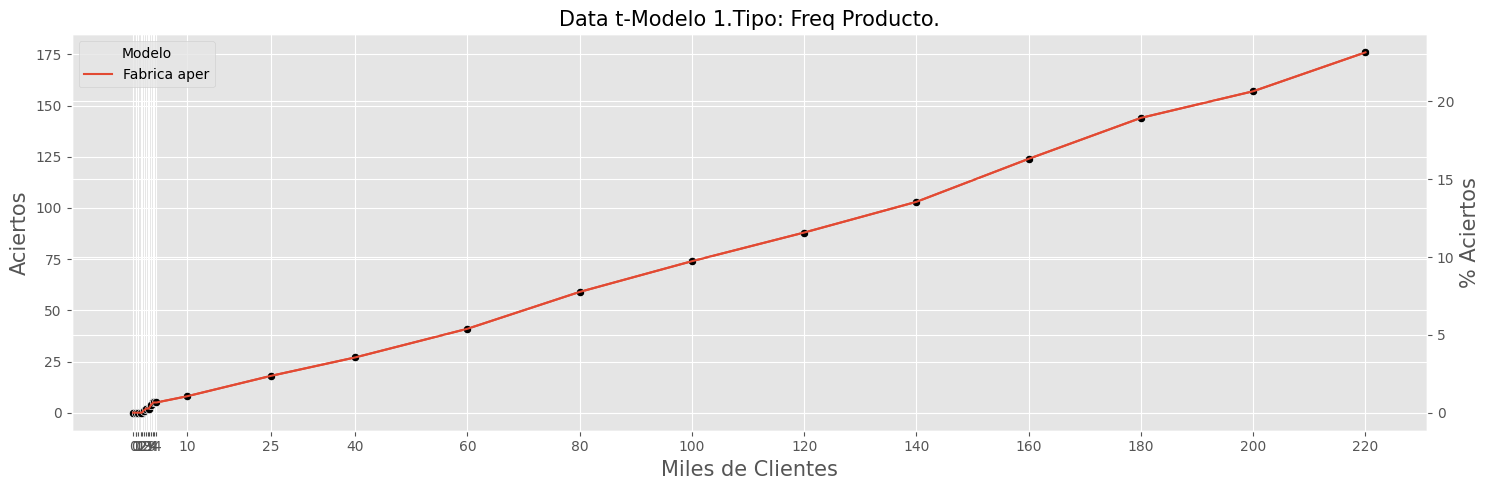

[02/27/25 22:14:41] INFO     ---------------------------------------------------                       ]8;id=10077;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=367866;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

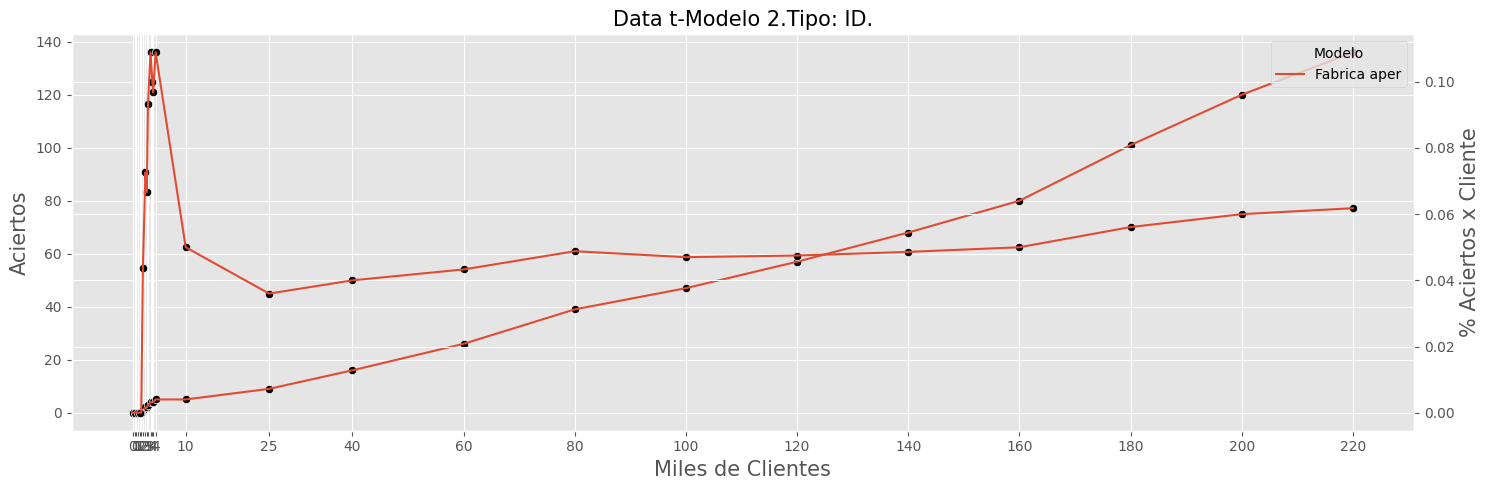

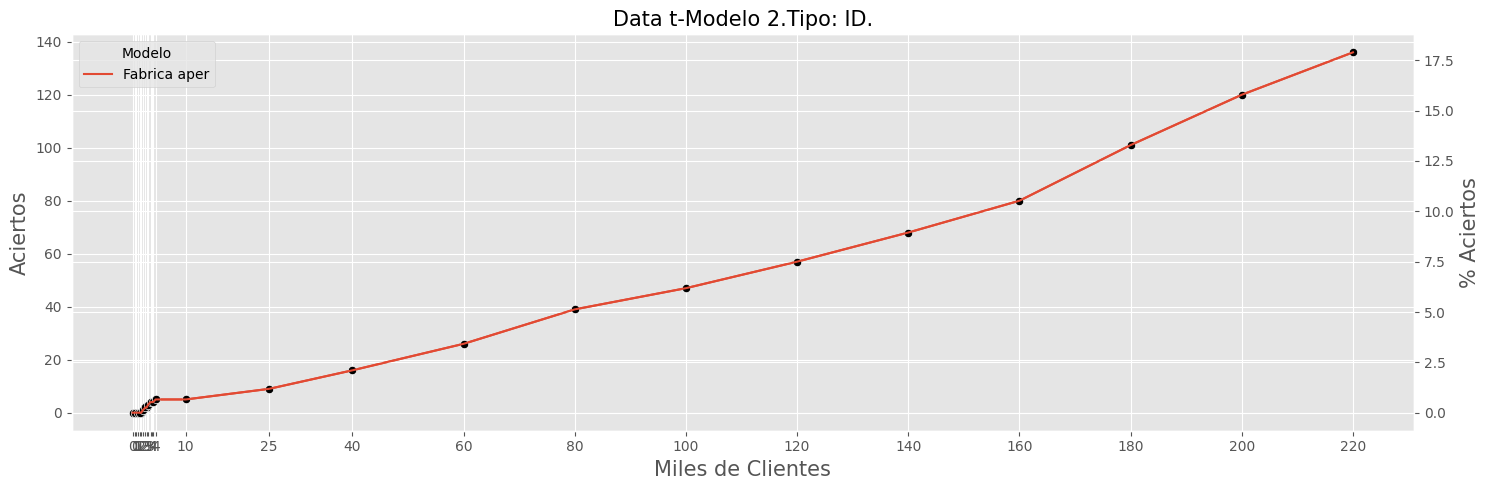

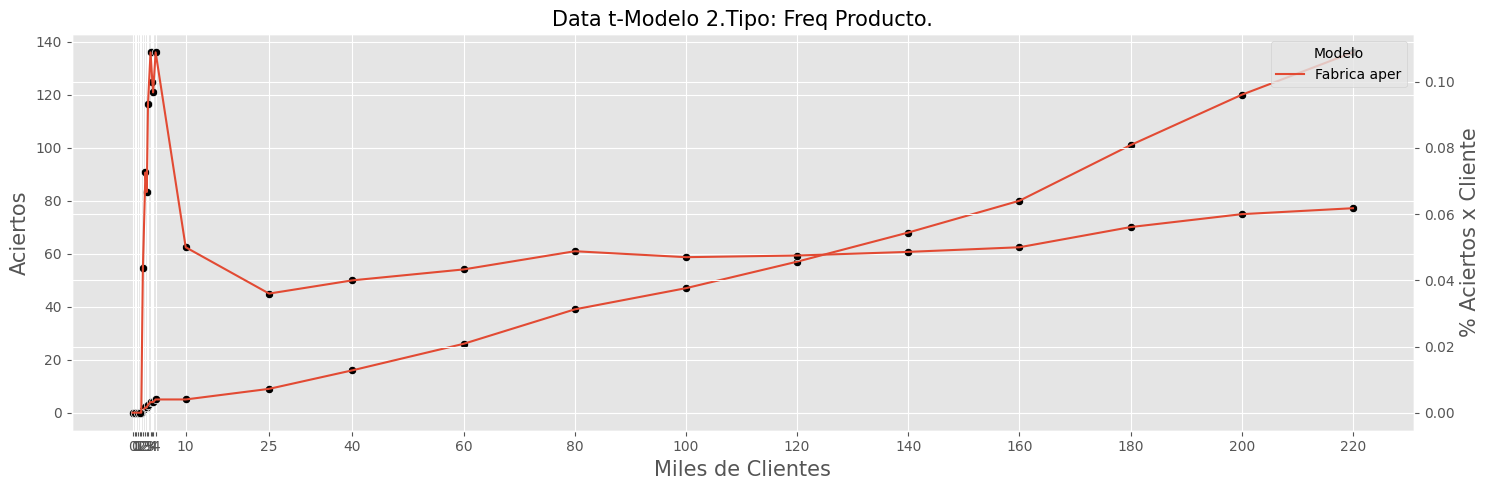

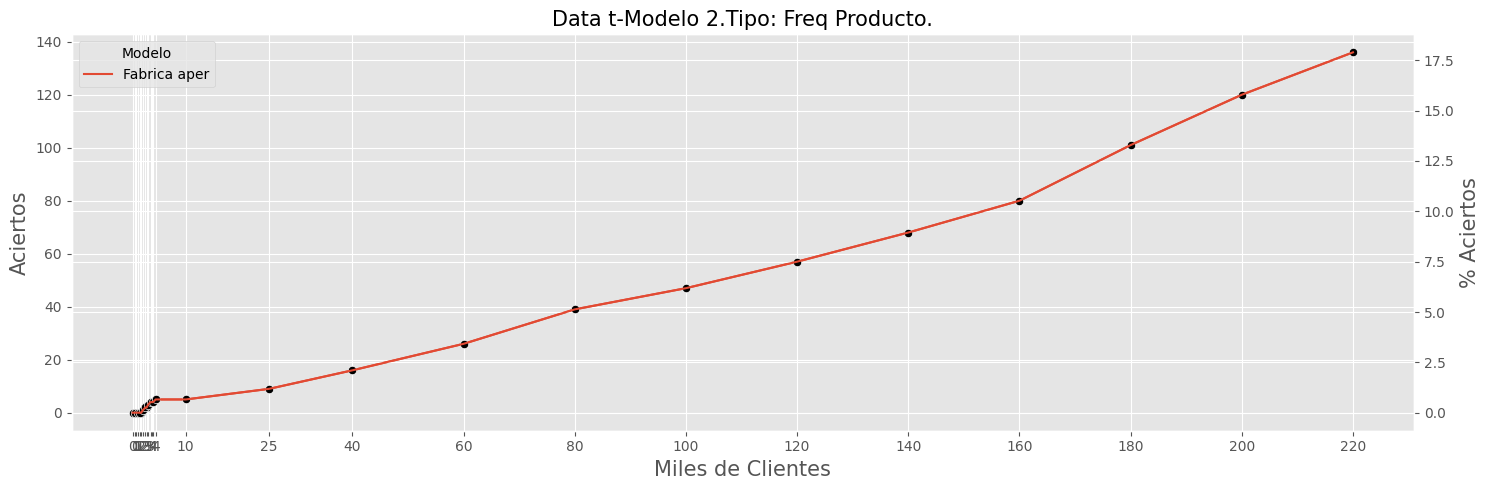

[02/27/25 22:14:43] INFO     ---------------------------------------------------                       ]8;id=812898;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=856378;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

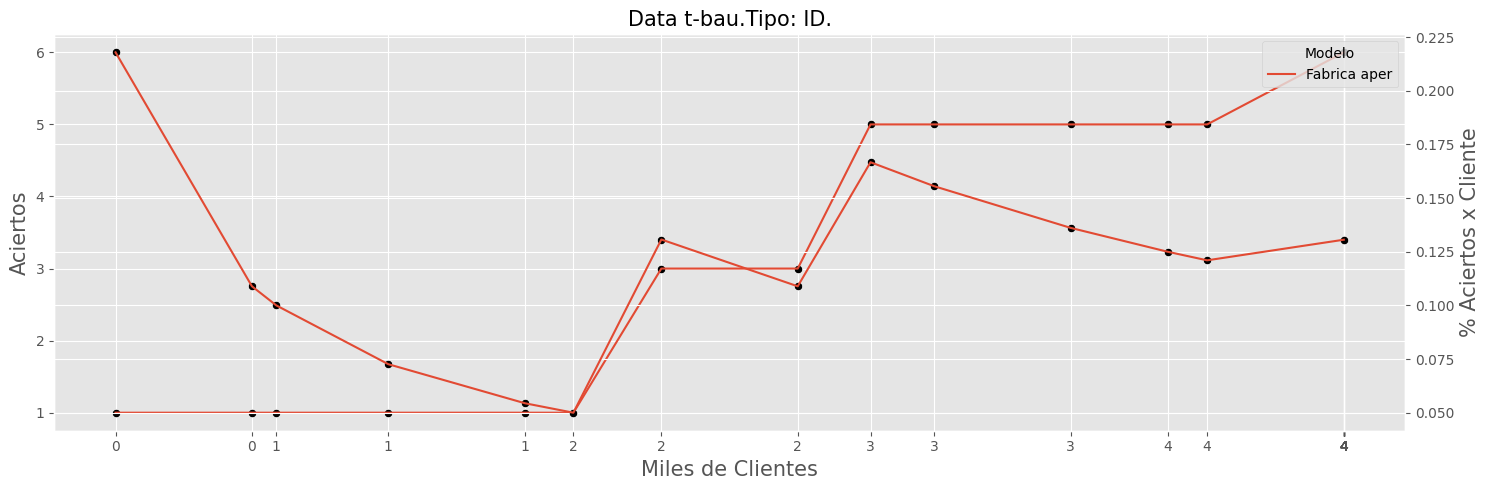

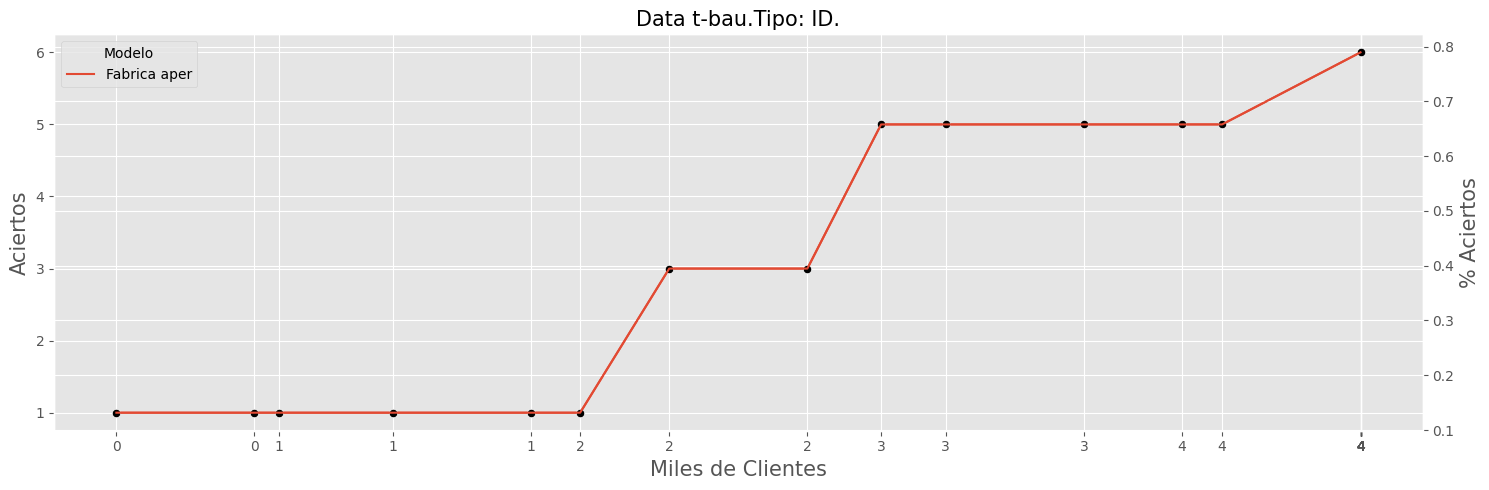

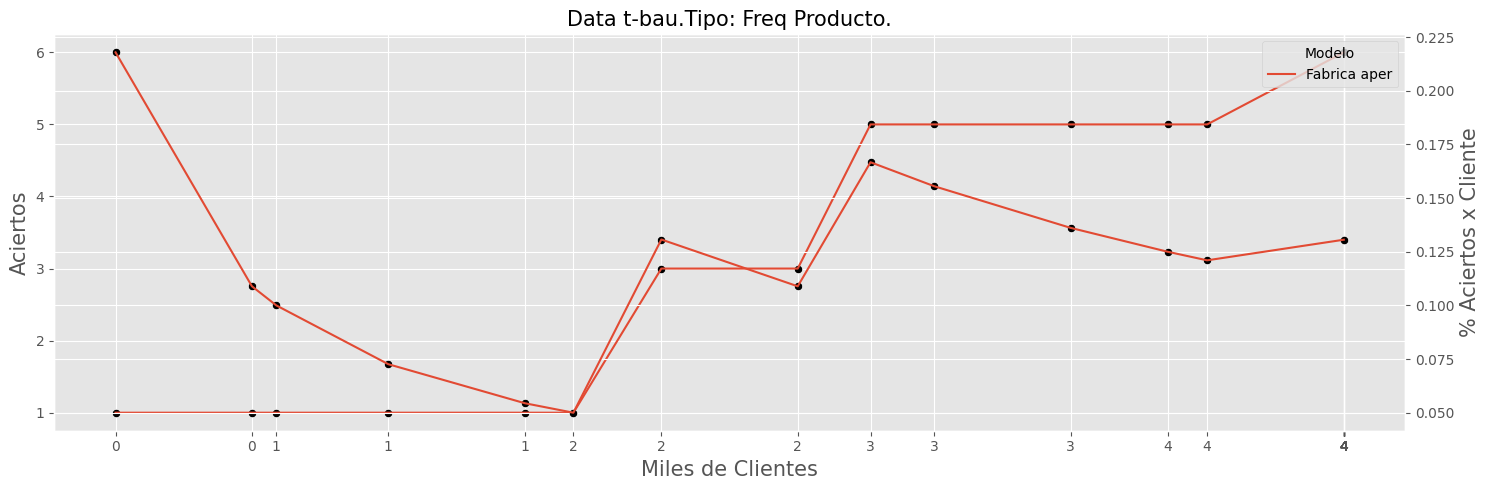

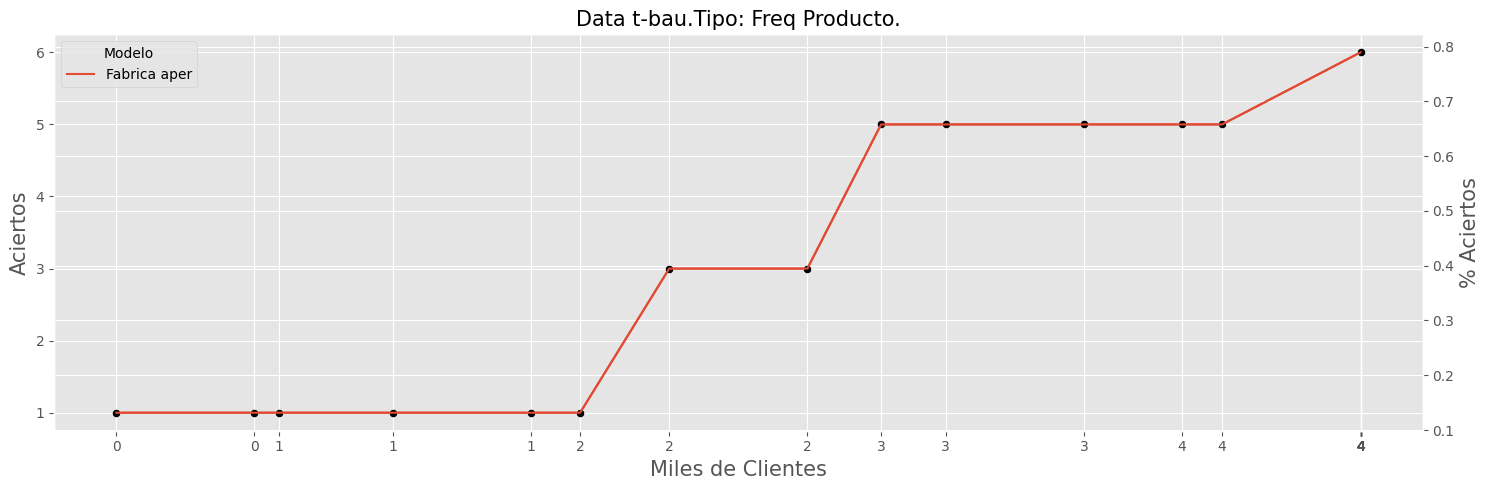

[02/27/25 22:14:44] INFO     ---------------------------------------------------                       ]8;id=219839;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=682161;file:///home/sagemaker-user/data-bbog-integration-fabrica-seguros/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

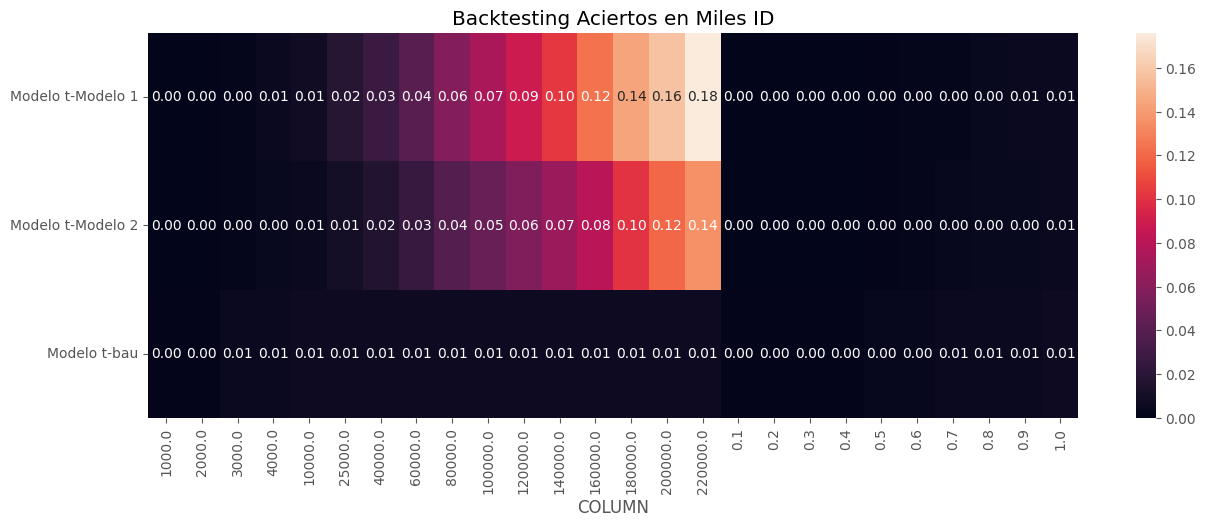

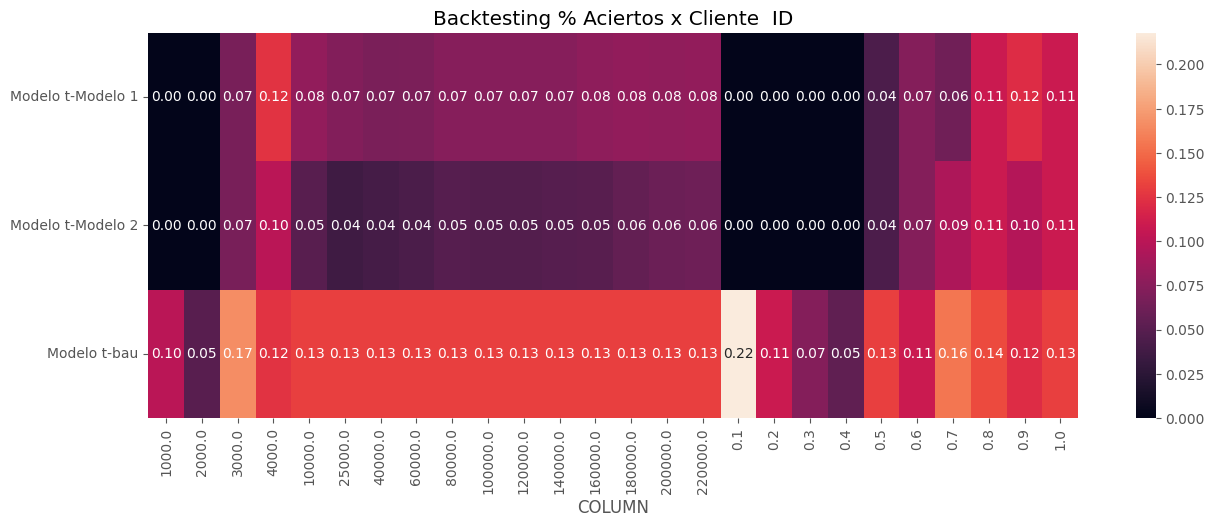

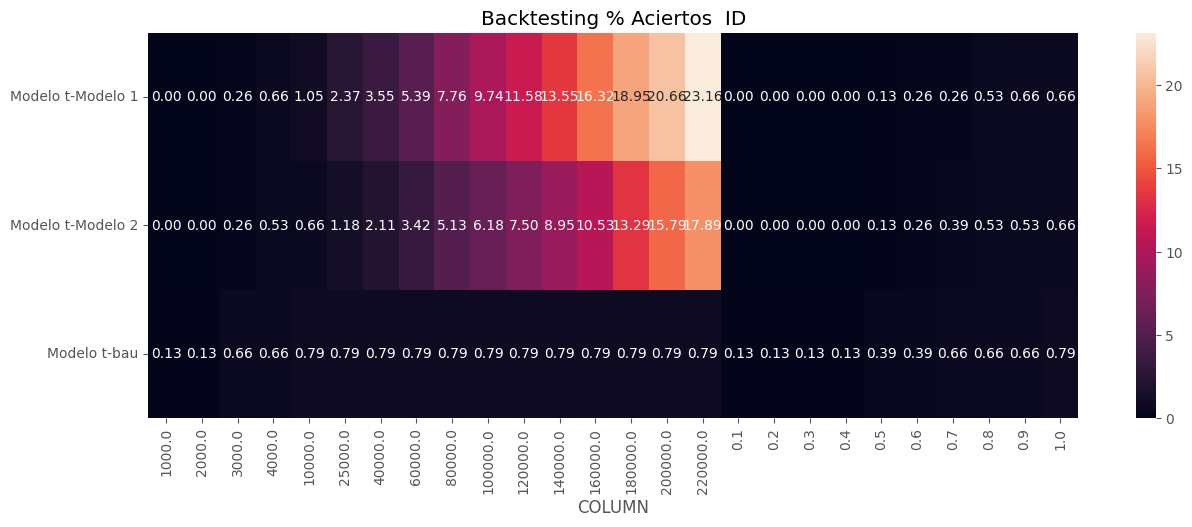

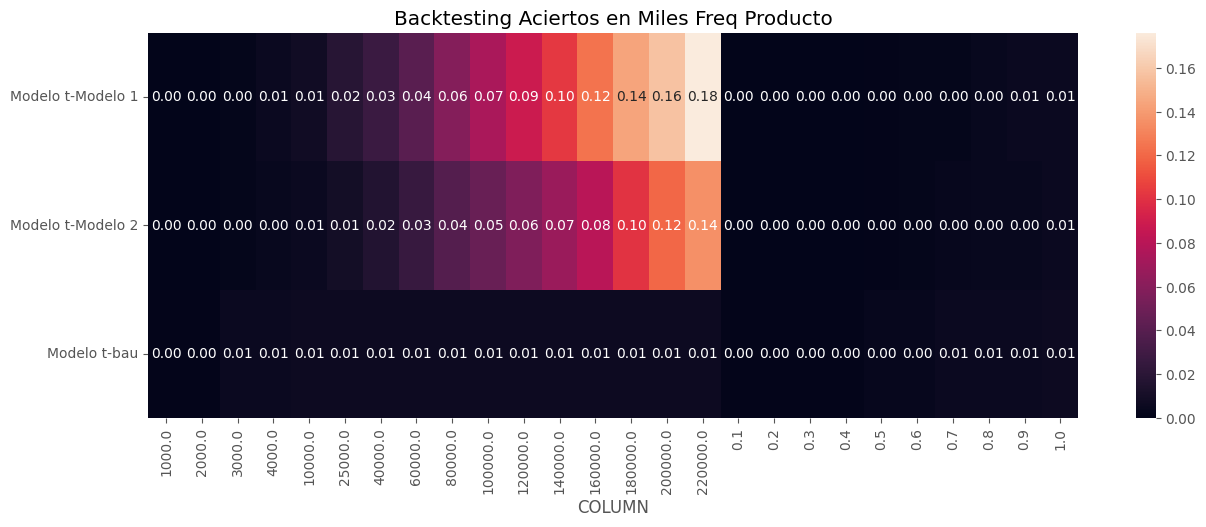

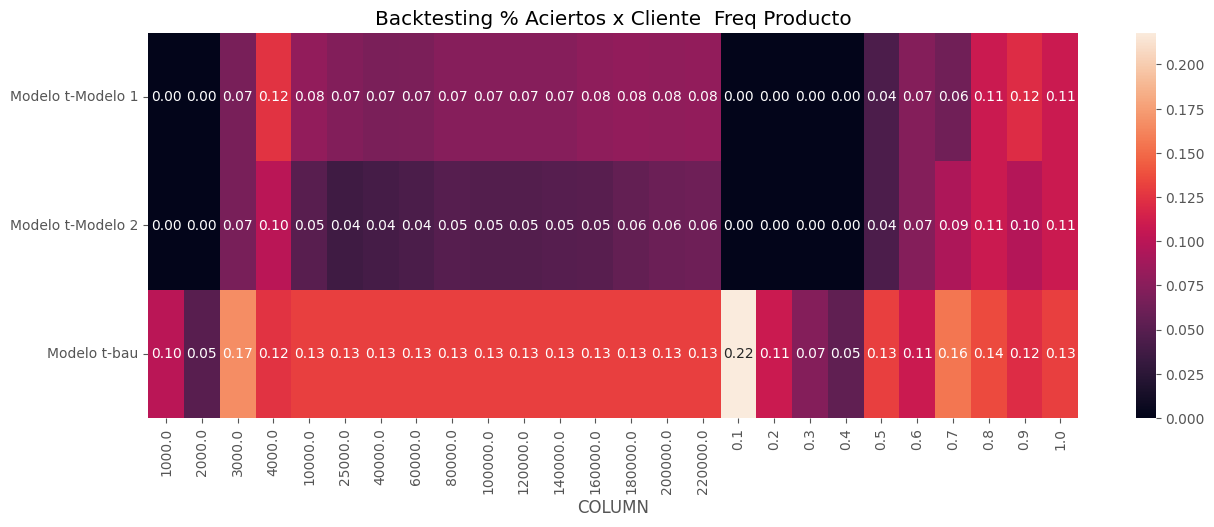

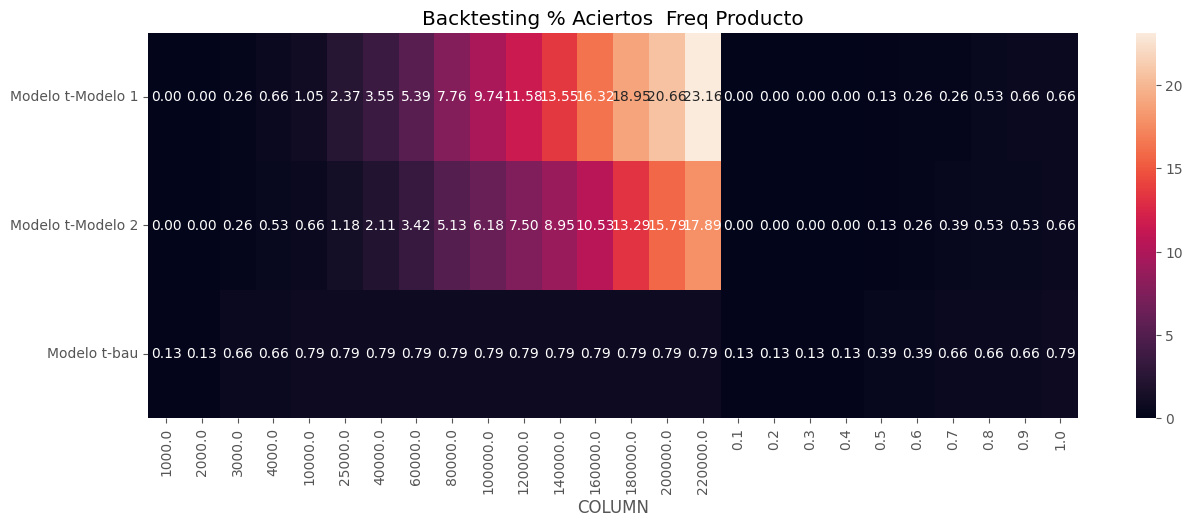

In [108]:
dic2 = backtesting.generar_curvas(dic,aperturas2,params)